In [1]:
# Importing the necessary libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import urllib.parse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
host = '18.136.157.135'
username = 'dm_team2'
password = 'DM!$Team&27@9!20!'
user_pass = urllib.parse.quote(password)
db_name = 'project_sales'

In [35]:
conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+host+'/'+db_name)
conn.table_names()

['data']

In [36]:
query = 'select * from data'
df = pd.read_sql(query,conn)

In [37]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [38]:
df.shape

(7422, 9)

In [39]:
df.drop(['Mobile'], axis = 1, inplace=True)
df.drop(['EMAIL'], axis = 1, inplace=True)
df.drop(['Created'], axis = 1, inplace=True)

In [40]:
df.replace('',np.nan,inplace=True)

In [41]:
df.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

#### Product_ID       

In [44]:
df.Product_ID.unique()

array(['9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20', '11',
       '21', '1', '12', '13', '24', '26', '16', '23', '22', '8', '14',
       '6', '17', '0', '28', '7', '4'], dtype=object)

In [50]:
df.Product_ID.nunique()

29

<AxesSubplot:xlabel='Product_ID'>

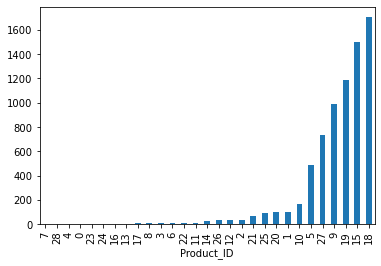

In [80]:
df.groupby('Product_ID')['Status'].count().sort_values(ascending=True).plot.bar()

#### Source           

In [45]:
df.Source.unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [51]:
df.Source.nunique()

25

<AxesSubplot:xlabel='Source'>

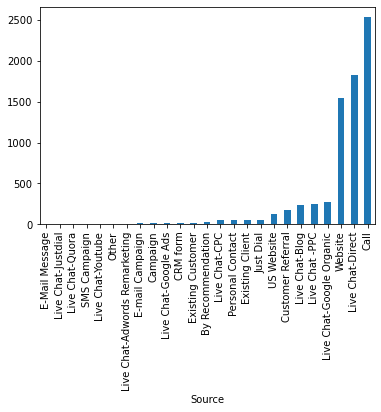

In [79]:
df.groupby('Source')['Status'].count().sort_values(ascending=True).plot.bar()

#### Sales_Agent      

In [46]:
df.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [52]:
df.Sales_Agent.nunique()

11

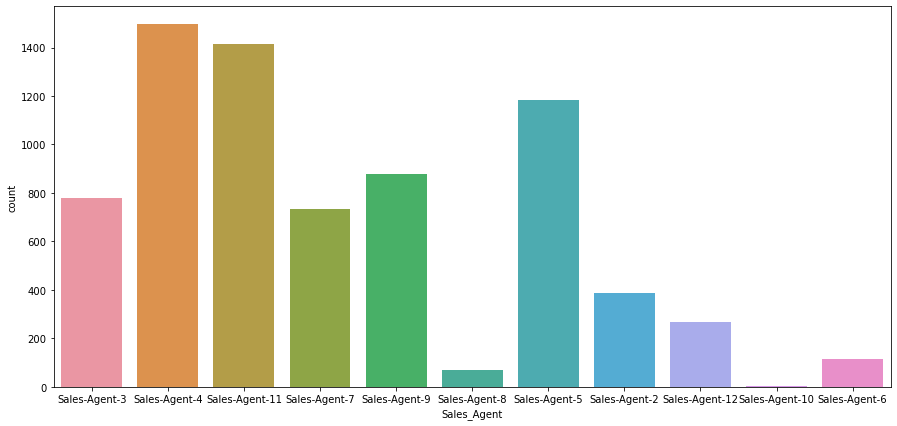

In [83]:
plt.figure(figsize = (15, 7))
sns.countplot(x = df.Sales_Agent)
plt.show()

#### Location         

In [47]:
df.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [53]:
df.Location.nunique()

17

<AxesSubplot:xlabel='Location'>

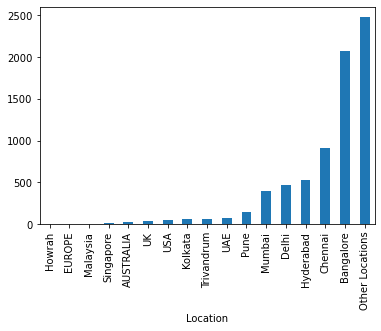

In [86]:
df.groupby('Location')['Status'].count().sort_values(ascending=True).plot.bar()

#### Delivery_Mode    

In [48]:
df.Delivery_Mode.unique()

array(['Mode-1', 'Mode-5', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [54]:
df.Delivery_Mode.nunique()

5

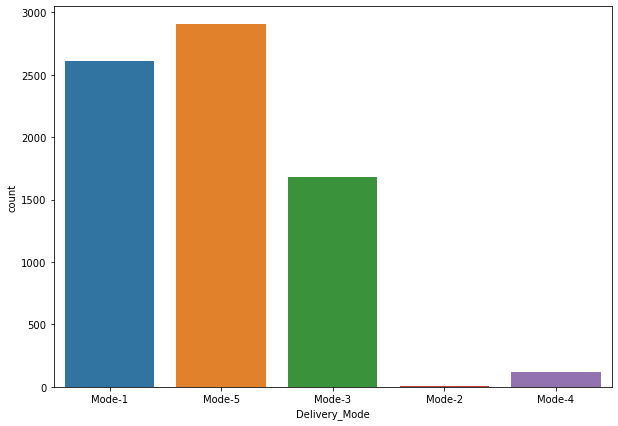

In [88]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df.Delivery_Mode)
plt.show()

#### Status           

In [49]:
df.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [55]:
df.Status.nunique()

11

In [67]:
# Defining 'Status' as 'Good' or 'Bad'
df.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Positive',inplace=True)
df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Negative',inplace=True)

<AxesSubplot:title={'center':'Sales Effectiveness'}>

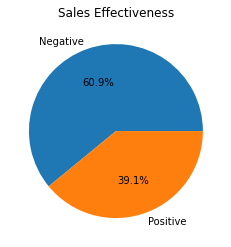

In [74]:
df.groupby('Status').size().plot(kind='pie', labels=['Negative','Positive'], title = 'Sales Effectiveness', explode = [0,0],autopct='%1.1f%%', ylabel = "")

In [89]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1296x504 with 0 Axes>

In [93]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr())
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1296x504 with 0 Axes>

In [16]:
# Giving labelfor catogorical columns
label_encoder = preprocessing.LabelEncoder()
df['Source']= label_encoder.fit_transform(df['Source'])
df['Sales_Agent']= label_encoder.fit_transform(df['Sales_Agent'])
df['Location']= label_encoder.fit_transform(df['Location'])
df['Delivery_Mode']= label_encoder.fit_transform(df['Delivery_Mode'])
df['Status']= label_encoder.fit_transform(df['Status'])

In [17]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,16,4,1,0,1
19,19,2,5,10,4,1
24,18,24,1,13,0,1
25,15,24,8,6,0,0
26,18,2,8,1,0,1


In [18]:
X = df.iloc[:,:-1]
y = df.Status

# Models

## Logistic Regression

In [97]:
# Fine tuning the parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
reg_model = LogisticRegression()
parameters = {'solver':['liblinear', 'lbfgs', 'sag'],
             'C':[0,5,10]}

grid_model = GridSearchCV(reg_model, parameters, cv=5, scoring='accuracy', error_score=0)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(),
             param_grid={'C': [0, 5, 10],
                         'solver': ['liblinear', 'lbfgs', 'sag']},
             scoring='accuracy')

In [98]:
grid_model.best_params_

{'C': 5, 'solver': 'liblinear'}

In [99]:
# Logistic Regression modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
reg_model = LogisticRegression(solver='liblinear' ,C=5)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8
[[7 1]
 [1 1]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



## Random Forest Classifier

In [103]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
rfc_model = RandomForestClassifier(n_estimators=50)
parameters = {"max_depth": [3, None],
              "max_features": [1,6,9,12],
              "criterion": ["gini","log_loss"]}

rscv_model = RandomizedSearchCV (rfc_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'criterion': ['gini', 'log_loss'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 6, 9, 12]})

In [104]:
rscv_model.best_params_

{'max_features': 1, 'max_depth': None, 'criterion': 'gini'}

In [138]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=20)

# Modle Training and evaluation
rfc_model = RandomForestClassifier(max_features=2,max_depth= None,criterion='gini')
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8
[[3 0]
 [2 5]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



## Decision Tree

In [139]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
dtc_model = DecisionTreeClassifier()
parameters = {'max_depth':[10,None],
             'criterion': ['gini','entropy']}

rscv_model = RandomizedSearchCV (dtc_model, param_distributions=parameters,cv=5)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, None]})

In [140]:
rscv_model.best_params_

{'max_depth': 10, 'criterion': 'entropy'}

In [146]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=12)

# Modle Training and evaluation
dtc_model = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  1.0
[[9 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## KNN

In [21]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
knn_model = KNeighborsClassifier()
parameters = {"n_neighbors": [3, 5, 7],
              "weights": ['uniform', 'distance'],
              "algorithm": ['auto','ball_tree','kd_tree','brute']}
rscv_model = RandomizedSearchCV (knn_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7],
                                        'weights': ['uniform', 'distance']})

In [22]:
rscv_model.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'algorithm': 'brute'}

In [24]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12, random_state=15)

# Modle Training and evaluation
knn_model = KNeighborsClassifier(n_neighbors=7,algorithm = 'brute', weights = 'uniform')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.75
[[3 2]
 [1 6]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12



# Naive Bayes

## Gaussian Naive Bayes

In [174]:
# Gaussian Naive Bayes modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
gnb_model_Multi = GaussianNB()
gnb_model_Multi.fit(X_train, y_train)
y_pred = gnb_model_Multi.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8
[[7 1]
 [1 1]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



## Multinomial Naive Bayes

In [162]:
# Multinomial Naive Bayes modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
gnb_model_Multi = MultinomialNB()
gnb_model_Multi.fit(X_train, y_train)
y_pred = gnb_model_Multi.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.7
[[6 2]
 [1 1]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.33      0.50      0.40         2

    accuracy                           0.70        10
   macro avg       0.60      0.62      0.60        10
weighted avg       0.75      0.70      0.72        10



## Bernoulli Naive Bayes

In [163]:
# Bernoulli Naive Bayes modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=40)
gnb_model_berno = BernoulliNB()
gnb_model_berno.fit(X_train, y_train)
y_pred = gnb_model_berno.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.6
[[13  5]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.29      0.29      0.29         7

    accuracy                           0.60        25
   macro avg       0.50      0.50      0.50        25
weighted avg       0.60      0.60      0.60        25



## Artificial Neural Network

In [27]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [28]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [29]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.7
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.33      0.50      0.40         2

    accuracy                           0.70        10
   macro avg       0.60      0.62      0.60        10
weighted avg       0.75      0.70      0.72        10



In [30]:
print(confusion_matrix(y_test,y_predict_mlp))

[[6 2]
 [1 1]]


In [ ]:
1) 58.5% of the leads are having Low Potential
2) Product ID 18, 19, 9, 27, 5, 15 are the most sold products
3) Live Chat-Direct, Call, Website are the mostly used source
4) Sales Agent 4, 11 and 5 are the top 3 most agents involed with more sales activites
5) Banglore is the top Location that involved in more sales activities followed by Chennai
6) Mode 1, Mode 5 and Mode 3 are the top most Delivery mode used